<a href="https://colab.research.google.com/github/approjecthub/Machine-learning/blob/master/cnn_keras_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import the necessary packages
from keras import backend as K
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.datasets import mnist
from keras.utils import np_utils
from keras.optimizers import SGD, RMSprop, Adam
import numpy as np

import matplotlib.pyplot as plt

Using TensorFlow backend.


In [0]:
np.random.seed(1671)  # for reproducibility

In [0]:
#define the convnet 
class LeNet:
	@staticmethod
	def build(input_shape, classes):
		model = Sequential()
		# CONV => RELU => POOL
		model.add(Conv2D(20, kernel_size=5, padding="same",
			input_shape=input_shape))
		model.add(Activation("relu"))
		model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
		# CONV => RELU => POOL
		model.add(Conv2D(50, kernel_size=5, padding="same"))
		model.add(Activation("relu"))
		model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
		# Flatten => RELU layers
		model.add(Flatten())
		model.add(Dense(500))
		model.add(Activation("relu"))
 
		# a softmax classifier
		model.add(Dense(classes))
		model.add(Activation("softmax"))

		return model


In [0]:
# network and training
NB_EPOCH = 20
BATCH_SIZE = 128
VERBOSE = 1
OPTIMIZER = Adam()
VALIDATION_SPLIT=0.2

IMG_ROWS, IMG_COLS = 28, 28 # input image dimensions
NB_CLASSES = 10  # number of outputs = number of digits
INPUT_SHAPE = (1, IMG_ROWS, IMG_COLS)


In [5]:
# data: shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()
K.set_image_dim_ordering("th")

11493376/11490434 [==============================] - 1s 0us/step


In [0]:
# consider them as float and normalize
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255 
X_test /= 255  


In [7]:
print(X_train.shape, 'train samples')
print(X_test.shape, 'test samples')
print('-------------------------------------------------------')

# we need a 60K x [1 x 28 x 28] shape as input to the CONVNET
X_train = X_train[:, np.newaxis, :, :]
X_test = X_test[:, np.newaxis, :, :]

print(X_train.shape, 'train samples')
print(X_test.shape, 'test samples')

(60000, 28, 28) train samples
(10000, 28, 28) test samples
-------------------------------------------------------
(60000, 1, 28, 28) train samples
(10000, 1, 28, 28) test samples


image label 5


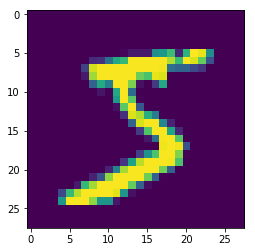

In [12]:
# Visualise trainig data
plt.imshow(X_train[0].reshape(28,28))

print('image label', y_train[0])

In [0]:
# convert class vectors to binary class matrices
y_train = np_utils.to_categorical(y_train, NB_CLASSES)
y_test = np_utils.to_categorical(y_test, NB_CLASSES)


In [0]:
# initialize the optimizer and model
model = LeNet.build(input_shape=INPUT_SHAPE, classes=NB_CLASSES)
model.compile(loss="categorical_crossentropy", optimizer=OPTIMIZER,
	metrics=["accuracy"])

history = model.fit(X_train, y_train, 
		batch_size=BATCH_SIZE, epochs=NB_EPOCH, 
		verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

score = model.evaluate(X_test, y_test, verbose=VERBOSE)

Instructions for updating:
Use tf.cast instead.
Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 8s 176us/step - loss: 0.1811 - acc: 0.9439 - val_loss: 0.0624 - val_acc: 0.9800
Epoch 2/20
48000/48000 [==============================] - 5s 109us/step - loss: 0.0517 - acc: 0.9842 - val_loss: 0.0496 - val_acc: 0.9845
Epoch 3/20
48000/48000 [==============================] - 5s 109us/step - loss: 0.0342 - acc: 0.9900 - val_loss: 0.0419 - val_acc: 0.9869
Epoch 4/20
48000/48000 [==============================] - 5s 110us/step - loss: 0.0244 - acc: 0.9920 - val_loss: 0.0419 - val_acc: 0.9855
Epoch 5/20
48000/48000 [==============================] - 5s 112us/step - loss: 0.0182 - acc: 0.9937 - val_loss: 0.0360 - val_acc: 0.9888
Epoch 6/20
48000/48000 [==============================] - 5s 112us/step - loss: 0.0126 - acc: 0.9957 - val_loss: 0.0361 - val_acc: 0.9886
Epoch 7/20
48000/48000 [==============================] - 5s 112us/step - 

In [0]:
print("\nTest score:", score[0])
print('Test accuracy:', score[1])


Test score: 0.029047093716733162
Test accuracy: 0.9929


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


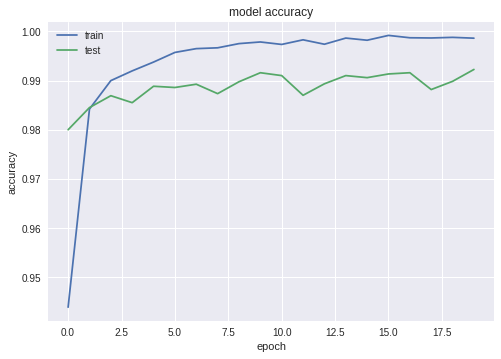

In [0]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

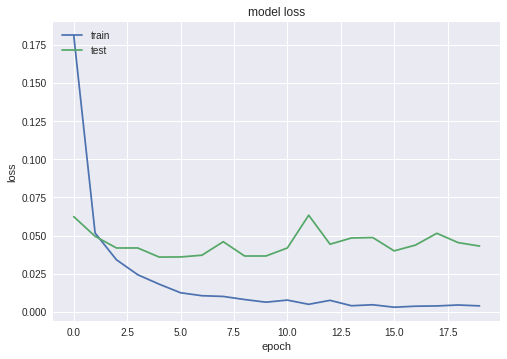

In [0]:

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()